In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [8]:
# para deixar as imagens maiores
plt.rcParams['figure.figsize'] = [10, 10]

In [9]:
w = np.load('worldmap-20181111-2022.npy')

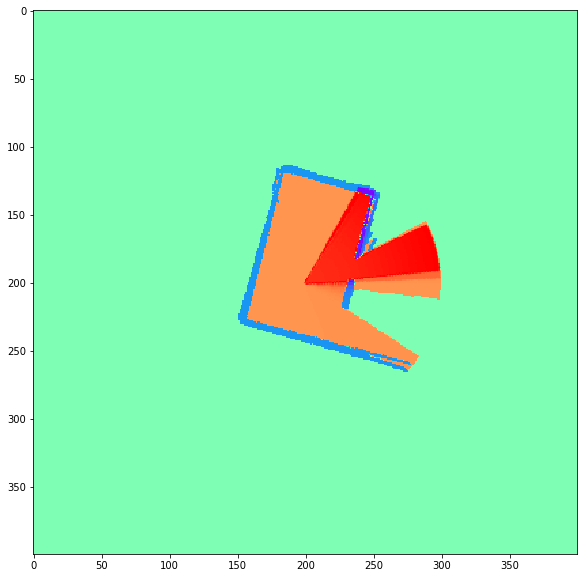

In [10]:
norm = Normalize(vmin=-2, vmax=1)
plt.imshow(norm(w),cmap=cm.rainbow_r)

In [11]:
import astar
reload(astar)

<module 'astar' from 'astar.py'>

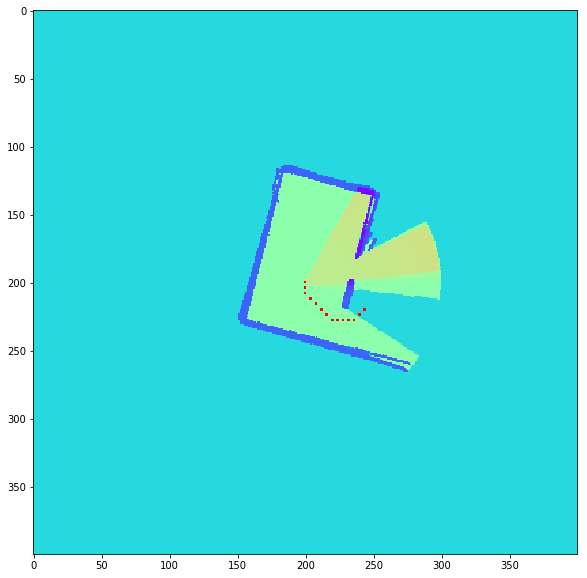

In [12]:
route = astar.mkRoute(w, (200, 200), (0,0))
temp = w.copy()
for row,col in route:
    temp[row-1:row+1, col-1:col+1] = -2
plt.imshow(norm(temp),cmap=cm.rainbow_r)

In [13]:
import harmonicpotentialfield
reload(harmonicpotentialfield)

<module 'harmonicpotentialfield' from 'harmonicpotentialfield.pyc'>

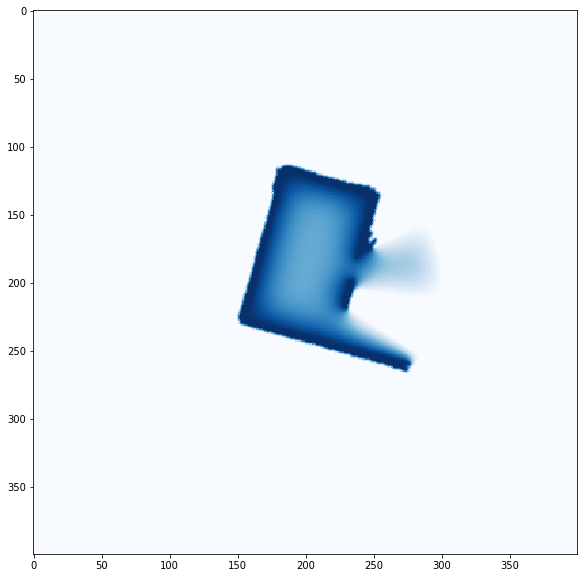

In [14]:
plt.imshow(harmonicpotentialfield.mkBVPMap(w),cmap=cm.Blues)

((400, 400, 4), -1.0, 1.0)

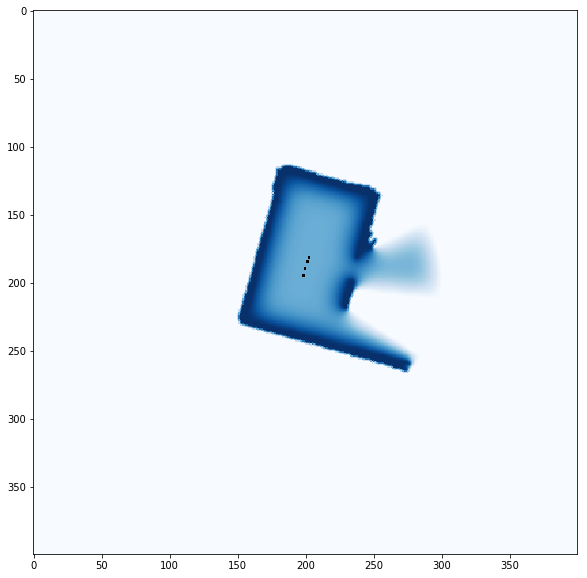

In [15]:
bvpmap = harmonicpotentialfield.mkBVPMap(w, steps=200)
route = harmonicpotentialfield.mkRoute(bvpmap, (200,200))
norm = Normalize(vmin=np.min(bvpmap), vmax=np.max(bvpmap))
img = cm.Blues(norm(bvpmap))
for row,col in route:
    img[row-1:row+1, col-1:col+1] = (0,0,0,255)
plt.imshow(img)
img.shape, np.min(bvpmap), np.max(bvpmap)